# Yelp Review - Data Collection&EDA

This is the first notebook of the Project 4 series. Its goal is data collection and EDA. To collect data we create helper functions for more efficient json parsing. Preliminary data cleaning includes the elimination of non-important features. We also explore some stats and perform some EDA.

#### Importing tools and libraries

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import re, string
import sys
import time
import collections

import pickle
from subprocess import check_output
%matplotlib inline

### Helper function
Allows to read large json files faster.

In [6]:
import json

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

* Note that below we are reading the big json file by means of our helper functions, so it runs much faster. <br>
    This is why we don't see the pd. next to read_json, as the helper function is utilized, rather thanj the one that was built into pandas.

In [5]:
yelp_tips = read_json('yelp_dataset/yelp_academic_dataset_tip.json')

In [6]:
yelp_tips.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


#### Review Data

In [ ]:
yelp_review= read_json('yelp_dataset/yelp_academic_dataset_review.json')

In [9]:
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


#### Restaurant Review Data

In [11]:
restaurantCheckin_df = pd.read_csv("yelp_dataset/restaurant_checkin.csv")

In [13]:
restaurantReviewdf = pd.merge(yelp_review, restaurantCheckin_df, on='business_id')

In [17]:
restaurantReviewdf.shape

(4218295, 23)

In [18]:
restaurantReviewdf.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date_x,Unnamed: 0,...,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,date_y,total
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,3765,...,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","2010-10-18 23:56:00, 2010-10-23 18:38:32, 2010...",24526
1,4jMOeTiqNXQ8bpmFdWoFUQ,zFCuveEe6M-ijY1iy23IJg,HQl28KMwrEKHqhFrrDqVNQ,5.0,6,2,5,"We walked into Melt. ""Did you want to put your...",2011-08-25 04:24:23,3765,...,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","2010-10-18 23:56:00, 2010-10-23 18:38:32, 2010...",24526
2,wHrtQRyk0ypungXd6hT8nQ,4V985R3RG-rv0B7WCPQzeQ,HQl28KMwrEKHqhFrrDqVNQ,1.0,1,0,0,I commented on how slow the service was last A...,2015-03-04 20:37:43,3765,...,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","2010-10-18 23:56:00, 2010-10-23 18:38:32, 2010...",24526
3,DTb3X5aVOGQ8HHCSAr87wA,nFGcoL6wuPQzxsNJVSfGrA,HQl28KMwrEKHqhFrrDqVNQ,4.0,2,0,0,We walked in off the streets on a September ni...,2014-09-10 01:38:55,3765,...,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","2010-10-18 23:56:00, 2010-10-23 18:38:32, 2010...",24526
4,NPyAutqgU_zIZBSnycJd6w,CJqgUQeWhdgbDyLAFy7xvQ,HQl28KMwrEKHqhFrrDqVNQ,4.0,0,0,0,Brunch on Saturday was excellent. The Bloody M...,2018-01-21 18:50:29,3765,...,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","2010-10-18 23:56:00, 2010-10-23 18:38:32, 2010...",24526


In [19]:
restaurantReviewdf.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date_x', 'Unnamed: 0', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_y',
       'review_count', 'attributes', 'categories', 'date_y', 'total'],
      dtype='object')

In [20]:
to_drop = ['Unnamed: 0', 'latitude', 'longitude', 'address', 'postal_code', 'date_x', 'date_y']
restaurantReviewdf.drop(to_drop, axis=1, inplace=True)

In [21]:
restaurantReviewdf.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,name,city,state,stars_y,review_count,attributes,categories,total
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
1,4jMOeTiqNXQ8bpmFdWoFUQ,zFCuveEe6M-ijY1iy23IJg,HQl28KMwrEKHqhFrrDqVNQ,5.0,6,2,5,"We walked into Melt. ""Did you want to put your...",Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
2,wHrtQRyk0ypungXd6hT8nQ,4V985R3RG-rv0B7WCPQzeQ,HQl28KMwrEKHqhFrrDqVNQ,1.0,1,0,0,I commented on how slow the service was last A...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
3,DTb3X5aVOGQ8HHCSAr87wA,nFGcoL6wuPQzxsNJVSfGrA,HQl28KMwrEKHqhFrrDqVNQ,4.0,2,0,0,We walked in off the streets on a September ni...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
4,NPyAutqgU_zIZBSnycJd6w,CJqgUQeWhdgbDyLAFy7xvQ,HQl28KMwrEKHqhFrrDqVNQ,4.0,0,0,0,Brunch on Saturday was excellent. The Bloody M...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526


In [22]:
# To remove the restaurants outside the U.S.
non_us = restaurantReviewdf[(restaurantReviewdf['state'] == 'ON') | (restaurantReviewdf['state'] == 'QC') | (restaurantReviewdf['state'] == 'AB') | \
              (restaurantReviewdf['state'] == 'BC') | (restaurantReviewdf['state'] == 'HPL') | (restaurantReviewdf['state'] == 'MB')].index

In [23]:
# ON, QC, AB, BC, HPL, MB <-- foreign entities.
restaurantReviewdf.drop(non_us, inplace=True)
restaurantReviewdf.dropna(inplace=True, axis=0, subset=['attributes'])

In [24]:
restaurantReviewdf.shape

(3484358, 16)

In [25]:
restaurantReviewdf.rename(columns={'stars_x': 'stars_review', 'stars_y':'stars_rest_avg'}, inplace = True)

In [26]:
restaurantReviewdf.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,name,city,state,stars_rest_avg,review_count,attributes,categories,total
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
1,4jMOeTiqNXQ8bpmFdWoFUQ,zFCuveEe6M-ijY1iy23IJg,HQl28KMwrEKHqhFrrDqVNQ,5.0,6,2,5,"We walked into Melt. ""Did you want to put your...",Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
2,wHrtQRyk0ypungXd6hT8nQ,4V985R3RG-rv0B7WCPQzeQ,HQl28KMwrEKHqhFrrDqVNQ,1.0,1,0,0,I commented on how slow the service was last A...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
3,DTb3X5aVOGQ8HHCSAr87wA,nFGcoL6wuPQzxsNJVSfGrA,HQl28KMwrEKHqhFrrDqVNQ,4.0,2,0,0,We walked in off the streets on a September ni...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526
4,NPyAutqgU_zIZBSnycJd6w,CJqgUQeWhdgbDyLAFy7xvQ,HQl28KMwrEKHqhFrrDqVNQ,4.0,0,0,0,Brunch on Saturday was excellent. The Bloody M...,Deagan's Kitchen & Bar,Lakewood,OH,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...",24526


In [27]:
restaurantReviewdf.city.nunique()

475

In [28]:
restaurantReviewdf.state.nunique()

18

In [29]:
restaurantReviewdf.state.unique()

array(['OH', 'NV', 'AZ', 'PA', 'NC', 'WI', 'SC', 'IL', 'CO', 'TX', 'NY',
       'FL', 'VT', 'HI', 'WA', 'OR', 'CA', 'VA'], dtype=object)

In [30]:
with open('restaurantReviewdf.pickle', 'wb') as to_write:
    pickle.dump(restaurantReviewdf, to_write)

#### Las Vegas Restaurant Review Data

In [ ]:
vegas_review = restaurantReviewdf[restaurantReviewdf.city == 'Las Vegas']

* Loading the dataframe from a pickle file.

In [5]:
with open('yelp_dataset/vegas_review.pickle', 'rb') as read_file:
    vegas_review = pickle.load(read_file)

In [6]:
vegas_review.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,name,city,state,stars_rest_avg,review_count,attributes,categories,total
1419,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0,0,0,10pm on a super bowl Sunday and they're alread...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188
1420,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0,0,0,Holy heck this place is amazing. I love their ...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188
1421,G-YhFo_55-3Br7DmF7BqeQ,3I806vywudUaWV6yVGHE2w,d4qwVw4PcN-_2mK2o1Ro1g,4.0,2,1,1,I was excited to finally eat here. I ordered C...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188
1422,qm-UfMPBg44gJALzaNAQjQ,yPM0X8nANqXUUrcZHVQSZQ,d4qwVw4PcN-_2mK2o1Ro1g,2.0,0,0,0,I don't know why people think this place is go...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188
1423,oT8P5jBU8ODQ-T_4x_6wWQ,Zfj1fLiPeqAtjQVJRTfpZQ,d4qwVw4PcN-_2mK2o1Ro1g,2.0,0,0,0,"Ate here in June and had the signature item, t...",Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188


In [33]:
vegas_review.shape

(1253163, 16)

* Saving a dataframe as a pickle file

In [34]:
with open('vegas_review.pickle', 'wb') as to_write:
    pickle.dump(vegas_review, to_write)

In [8]:
vegas_review.reset_index(inplace = True)

In [9]:
vegas_review.head(2)

,index,review_id,user_id,business_id,stars_review,useful,funny,cool,text,name,city,state,stars_rest_avg,review_count,attributes,categories,total
0,1419,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0,0,0,10pm on a super bowl Sunday and they're alread...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188
1,1420,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0,0,0,Holy heck this place is amazing. I love their ...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188


In [10]:
vegas_review.drop('index', axis = 1, inplace=True)

#### Some review stats

In [38]:
useful_reviews = len(vegas_review[vegas_review["useful"]>0])
cool_reviews = len(vegas_review[vegas_review["cool"]>0])
funny_reviews = len(vegas_review[vegas_review["funny"]>0])
negative_reviws = len(vegas_review[vegas_review["stars_review"]<2])
positive_reviews =len(vegas_review[vegas_review["stars_review"]>3])
total_reviews = len(vegas_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))


Total reviews: 1253163
Useful reviews: 484871
Funny reviews: 243839
Cool reviews: 308904
Total negative reviews: 152646
Total positive reviews: 855070


#### Creating the corpus

* The corpus consisting of all the Vegas restaurant reviews: 1,253,163 entries.

In [29]:
vegas_corpus = vegas_review['text']

In [30]:
vegas_corpus

0          10pm on a super bowl Sunday and they're alread...
1          Holy heck this place is amazing. I love their ...
2          I was excited to finally eat here. I ordered C...
3          I don't know why people think this place is go...
4          Ate here in June and had the signature item, t...
                                 ...                        
1253158    The employees are amazing and the food is fant...
1253159    My friends were probably asking "Izzy really g...
1253160    Wow!!!  This is some of the best pizza I have ...
1253161    I am an east coaster, now living in las vegas ...
1253162    Had to get on and let you all know that this p...
Name: text, Length: 1253163, dtype: object

* Let's practice on a **smaller corpus** first. I called it **vegas_corpus_sample**, that encompasses a random sample of 100,000 reviews. It will allow us for faster testing of the cleaning function and the pipeline in general. The NLP Pipeline works smoothly with this amount.

In [15]:
vegas_corpus_sample = vegas_review.sample(100000)

In [16]:
vegas_corpus_sample

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,name,city,state,stars_rest_avg,review_count,attributes,categories,total
83393,HbSj6NITXIhyQuD7ZcQohw,Ys-EcbaWcpnpvhV_rbv02g,Zmfq3DVhHdtVChhSxzoUHw,5.0,0,0,0,This restaurant continues to deliver excellenc...,Panna Thai Restaurant,Las Vegas,NV,4.0,650,"{'GoodForKids': 'True', 'Alcohol': ""u'beer_and...","Thai, Beer, Wine & Spirits, Restaurants, Veget...",33514
1218634,cv3TV3yJNgrH8aY28B0p-w,0NkzY-xjj2GeynGxU8g3bA,yp2nRId4v-bDtrYl5A3F-g,5.0,5,0,2,"You must try Nattaya's, and give your usual re...",Nittaya's Secret Kitchen,Las Vegas,NV,4.5,929,"{'BusinessParking': ""{'garage': False, 'street...","Thai, Restaurants",38344
758017,aw240bhP6HVdlvQhy8JPxg,wqry2RbeN7DTvBZrW7QjAA,BjrKNWhtQkedHw8hP_0Bjg,5.0,1,0,0,How yummie is this place ?!?! Love the variet...,Umami,Las Vegas,NV,4.5,720,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Sushi Bars, Japanese, Restaurants, Buffets, De...",69466
546976,HEZWT7yeJLvmmgQ8EvnIQA,NG129DDINMcrw6LxaaBkIA,osu1j_Lg8R9brpuMMn3a3A,4.0,0,0,0,The food was good but the lighting made it dif...,Fogo de Chão Brazilian Steakhouse,Las Vegas,NV,4.0,1340,"{'Ambience': ""{'romantic': False, 'intimate': ...","Steakhouses, Restaurants, Brazilian, Seafood",72322
149312,cLaYCvgaF4EwczQRh3f95g,EO_P54j0zb4oCempJoRaJw,3GEEy7RP6e4bT4LAiWFMFQ,5.0,0,0,0,Yum yum yum! Love this place! Great service!!!...,Pizza Rock,Las Vegas,NV,4.0,2427,"{'RestaurantsAttire': ""u'casual'"", 'WiFi': ""u'...","Restaurants, Pizza",190132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16968,cCaW0jXjFACh9oBIxsidBw,a0gDyjgvR3hL1UF1CYnBng,lmxA0dJM0XsPCIHPXhEQ-g,1.0,1,0,0,Terrible service. Food pricey. Small servings....,Sake Rok,Las Vegas,NV,4.0,1110,"{'RestaurantsTakeOut': 'True', 'HappyHour': 'T...","Restaurants, Asian Fusion, Japanese, Bars, Sus...",25912
172146,Z_Z_OhkGcwM8ThDDSOShwg,0De5alHpWvnRo_lI5qRE-g,I22wQGTkLFGn6jTOhwoecQ,2.0,1,0,0,2.5 stars\nThis is my second time ever coming ...,Pepe's Tacos,Las Vegas,NV,3.0,151,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Restaurants, Mexican",12787
1100216,JJmbSMVN_zsc-k9lcrHUfA,2qVTWphCSUC7trLpqV93bw,8chcaZIRlP4p5anpzUB3FQ,4.0,0,0,0,Found this gem by accident. Our server Maggie ...,Dirty Fork,Las Vegas,NV,4.0,562,"{'RestaurantsTakeOut': 'True', 'WheelchairAcce...","Coffee & Tea, Breakfast & Brunch, Restaurants,...",14278
690185,gHPk1bR_k_JuvUAZzRwbyA,UGo9F0PwBooMdA9MJ_hfIA,ZhLSAiRj9kANxf8m2SBfRA,5.0,0,0,0,I always get my thai food to-go order from her...,Lucki Thai,Las Vegas,NV,4.5,839,"{'WiFi': ""'no'"", 'RestaurantsGoodForGroups': '...","Thai, Local Flavor, Restaurants",31141


### Some EDA

* Do people tend to write longer reviews when they are happy or vice versa?

In [43]:
vegas_review['review_length'] = vegas_review['text'].apply(len)

/Users/sasha_prokhorova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
vegas_review.reset_index(inplace = True)

In [54]:
vegas_review.head()

,index,review_id,user_id,business_id,stars_review,useful,funny,cool,text,name,city,state,stars_rest_avg,review_count,attributes,categories,total,review_length
0,1419,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0,0,0,10pm on a super bowl Sunday and they're alread...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188,102
1,1420,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0,0,0,Holy heck this place is amazing. I love their ...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188,144
2,1421,G-YhFo_55-3Br7DmF7BqeQ,3I806vywudUaWV6yVGHE2w,d4qwVw4PcN-_2mK2o1Ro1g,4.0,2,1,1,I was excited to finally eat here. I ordered C...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188,152
3,1422,qm-UfMPBg44gJALzaNAQjQ,yPM0X8nANqXUUrcZHVQSZQ,d4qwVw4PcN-_2mK2o1Ro1g,2.0,0,0,0,I don't know why people think this place is go...,Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188,722
4,1423,oT8P5jBU8ODQ-T_4x_6wWQ,Zfj1fLiPeqAtjQVJRTfpZQ,d4qwVw4PcN-_2mK2o1Ro1g,2.0,0,0,0,"Ate here in June and had the signature item, t...",Pink Taco,Las Vegas,NV,3.5,1120,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Mexican, Restaurants",71188,303


In [55]:
vegas_review['text'][0] # length = number of characters (including spaces)

"10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off..."

Length of a review (note: characters, not words) vs. stars:

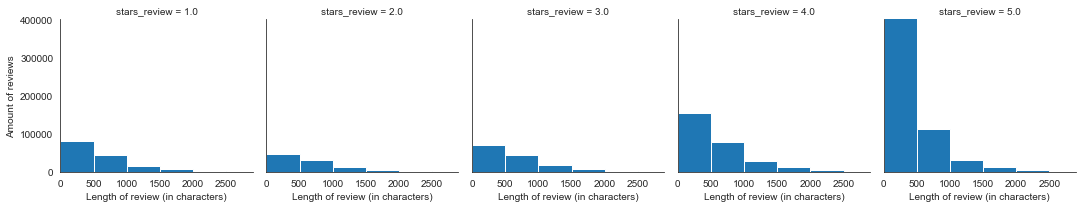

In [72]:
sns.set_style('white')
g = sns.FacetGrid(vegas_review,col='stars_review')
g.map(plt.hist,'review_length')
g = (g.set_axis_labels("Length of review (in characters)","Amount of reviews").set(xlim=(0,2900),ylim=(0,400000)));

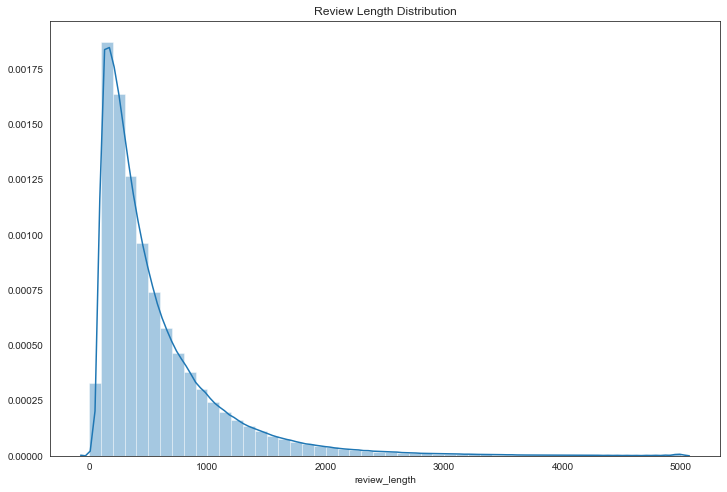

In [75]:
fig = plt.figure(figsize=(12,8))
sns.distplot(vegas_review['review_length'], kde=True, bins=50)
plt.title('Review Length Distribution');

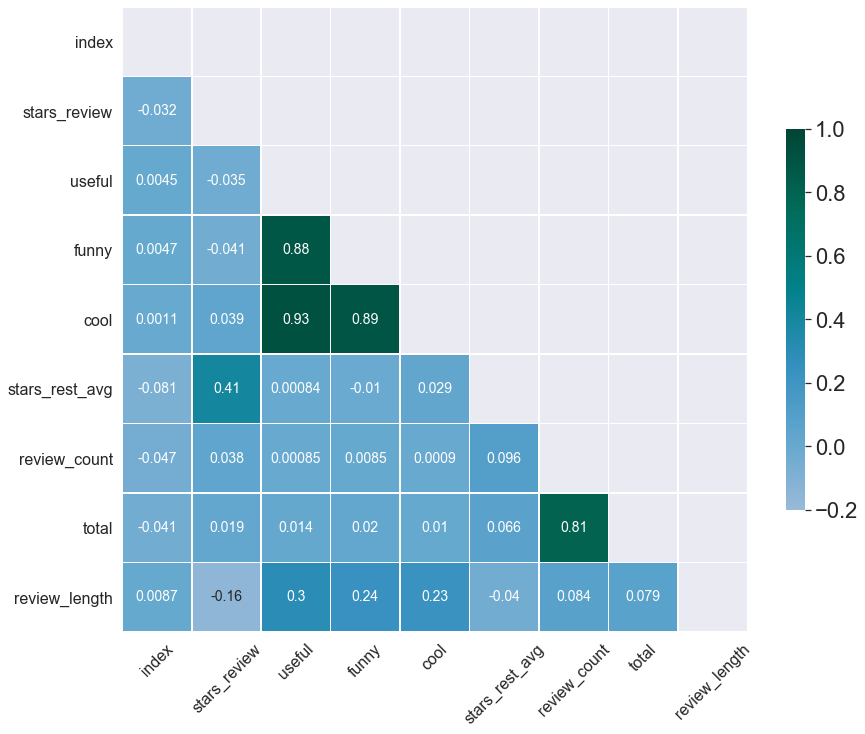

In [78]:
# Two lines of code below will help us remove the duplicate values from the heatmap, 
# so that is a triangle as opposed to square: less crowded feel.
mask = np.zeros(vegas_review.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

# In this heatmap, we include ratings and see if there's any correlations.
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(vegas_review.corr(), cmap="PuBuGn", cbar = True, \
            annot=True, annot_kws={"size":14}, \
            vmin=-0.2, vmax=1, center = 0, mask = mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# For better visual alignment:
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Tick label alignment.
plt.yticks(rotation = 0, fontsize = 16)
plt.xticks(rotation = 45, fontsize = 16)

plt.show() 